In [2]:
import numpy as np 
import pandas as pd 
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap

In [6]:
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join

In [7]:
from scipy import misc
from random import shuffle
from collections import Counter

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
import tensorflow as tf

In [16]:
os.chdir('../mody/input/utkface-new')
os.chdir('UTKFace')

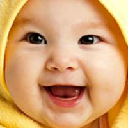

In [18]:
# im =Image.open('1_0_0_20170110212704144.jpg.chip.jpg').resize((128,128))
# im

In [19]:
onlyfiles = os.listdir()

In [20]:
len(onlyfiles)

23708

In [21]:
shuffle(onlyfiles)
gender = [i.split('_')[1] for i in onlyfiles]

In [22]:
# the image data is in its name means the first box of the second cell, the second gender, the second one, so the first step is that we are trying to separate the labels from the images so that they are stored in the classes as much as we need them
# split the data into Gender Classes - 0 Male 1 Female

classes = []
for i in gender:
    i = int(i)
    classes.append(i)

In [23]:
# convert images to vectors
X_data =[]
for file in onlyfiles:
    face = misc.imread(file)
    face = cv2.resize(face, (32, 32) )
    X_data.append(face)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
X = np.squeeze(X_data)

In [25]:
X.shape

(23708, 32, 32, 3)

In [26]:
# normalize data
X = X.astype('float32')
X /= 255

In [27]:
classes[:10]

[0, 0, 0, 1, 1, 0, 0, 0, 1, 1]

In [28]:
categorical_labels = to_categorical(classes, num_classes=2)

In [29]:
categorical_labels[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [30]:
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [31]:
len(x_train)+len(x_test) + len(x_valid) == len(X)

True

In [32]:
model = tf.keras.Sequential()

In [33]:
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [34]:
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [35]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [36]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=35,
         validation_data=(x_valid, y_valid),)

Train on 15008 samples, validate on 7000 samples
Epoch 1/35
15008/15008 [==============================] - 39s 3ms/step - loss: 0.5718 - acc: 0.7050 - val_loss: 0.4564 - val_acc: 0.7996
Epoch 2/35
15008/15008 [==============================] - 36s 2ms/step - loss: 0.4331 - acc: 0.8034 - val_loss: 0.3713 - val_acc: 0.8352
Epoch 3/35
15008/15008 [==============================] - 34s 2ms/step - loss: 0.3915 - acc: 0.8237 - val_loss: 0.3393 - val_acc: 0.8471
Epoch 4/35
15008/15008 [==============================] - 34s 2ms/step - loss: 0.3703 - acc: 0.8315 - val_loss: 0.3277 - val_acc: 0.8581
Epoch 5/35
15008/15008 [==============================] - 35s 2ms/step - loss: 0.3545 - acc: 0.8408 - val_loss: 0.3184 - val_acc: 0.8534
Epoch 6/35
15008/15008 [==============================] - 39s 3ms/step - loss: 0.3380 - acc: 0.8503 - val_loss: 0.3031 - val_acc: 0.8631
Epoch 7/35
15008/15008 [==============================] - 37s 2ms/step - loss: 0.3347 - acc: 0.8502 - val_loss: 0.3005 - val_acc:

In [37]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9026470588235294


In [38]:
labels =["Male",  # index 0
        "Female", # index 1
        ]

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


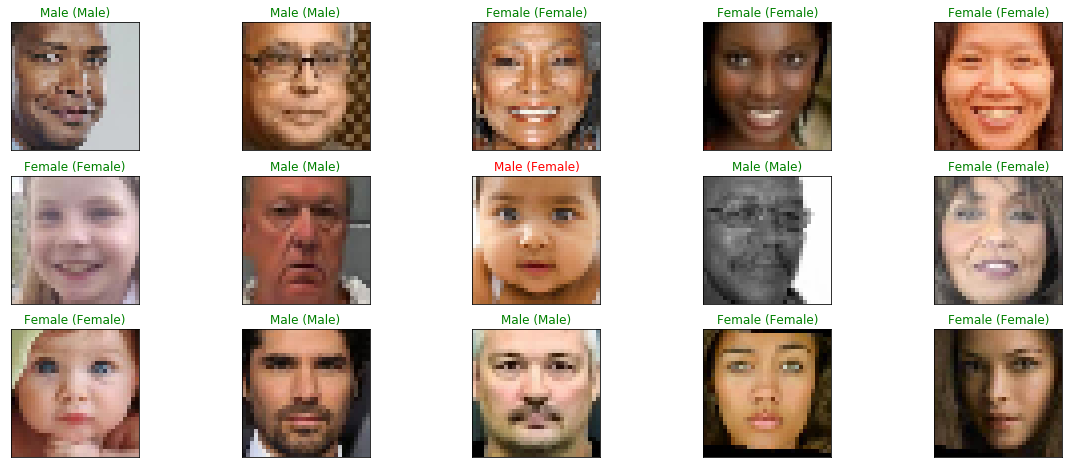

In [39]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()